# Installing Required libraries
## load the libraries

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Data

In [18]:
transaction_data = pd.read_excel("D:\\Quantium_Data_Analysis_job\\QVI_transaction_data.xlsx")
purchase_behaviour = pd.read_csv("D:\\Quantium_Data_Analysis_job\\QVI_purchase_behaviour.csv")

# Display the first rows of each dataset
transaction_data.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Data Exploration

### 1.Transaction Data

In [20]:
# checking for null values , basic statistics and duplicates
print(transaction_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [21]:
print(transaction_data.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [22]:
# Checkin for missing values
print(transaction_data.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [23]:
# checking for duplicates
print(transaction_data.duplicated().sum())

1


### 2.Purchase_behaviour dataset


In [24]:
#check structure and summary
print(purchase_behaviour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [25]:
print(purchase_behaviour.describe())

       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


In [26]:
#check for missing values 
print(purchase_behaviour.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [27]:
#check for duplicates
print(purchase_behaviour.duplicated().sum())

0


#### Convert DATE column to a date format
#### A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899


In [28]:
transaction_data['DATE'] = transaction_data['DATE'].astype(float).astype(int)
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')
    
print("\nUpdated DATE column")
print(transaction_data[['DATE']].head())


Updated DATE column
        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18


### Summary of the PROD_NAME Column

In [29]:
print("Summary of PROD_NAME Column")
print(transaction_data['PROD_NAME'].describe())

Summary of PROD_NAME Column
count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object


In [30]:
# split product names into individual words
product_words = pd.Series(" ".join(transaction_data['PROD_NAME'].unique()).split())

# create df to hold these words
product_words_df = pd.DataFrame(product_words, columns=['words'])

#display few rows
print(product_words_df.head())

         words
0      Natural
1         Chip
2       Compny
3  SeaSalt175g
4          CCs


In [31]:
# Remove words with digits and special characters

# filter out those words
filtered_product_words = product_words_df[~product_words_df['words'].str.contains(r'[^a-zA-Z]', regex=True)]

#display cleaned list of words
print("\nFiltered product words: ")
print(filtered_product_words.head())


Filtered product words: 
     words
0  Natural
1     Chip
2   Compny
4      CCs
5    Nacho


In [32]:

filtered_product_words = transaction_data['PROD_NAME'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Split the cleaned product names into individual words
product_words = filtered_product_words.str.split().explode().reset_index(drop=True)

# Count the frequency 
word_counts = product_words.value_counts().reset_index()
word_counts.columns = ['word', 'frequency']

# Sort the words by freq
word_counts_sorted = word_counts.sort_values(by='frequency', ascending=False)

# Display
print(word_counts_sorted.head(20))


        word  frequency
0          g     246628
1      Chips      49770
2     Kettle      41288
3     Smiths      28860
4       Salt      27976
5     Cheese      27890
6   Pringles      25102
7    Doritos      24962
8    Crinkle      23960
9       Corn      22063
10  Original      21560
11       Cut      20754
12      Chip      18645
13     Salsa      18094
14   Chicken      15407
15       Sea      14145
16     Thins      14075
17    Chilli      13895
18      Sour      13882
19    Crisps      12607


In [33]:
# Create a new column to flag salsa products
transaction_data['SALSA'] = transaction_data['PROD_NAME'].str.contains('salsa', case=False)

# Filter out rows where SALSA is True
transaction_data_cleaned = transaction_data[transaction_data['SALSA'] == False].drop(columns=['SALSA'])

# Display the cleaned dataset
print("\nCleaned dataset (salsa products removed):")
print(transaction_data_cleaned.head())



Cleaned dataset (salsa products removed):
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [34]:
print(word_counts_sorted.head(20))


        word  frequency
0          g     246628
1      Chips      49770
2     Kettle      41288
3     Smiths      28860
4       Salt      27976
5     Cheese      27890
6   Pringles      25102
7    Doritos      24962
8    Crinkle      23960
9       Corn      22063
10  Original      21560
11       Cut      20754
12      Chip      18645
13     Salsa      18094
14   Chicken      15407
15       Sea      14145
16     Thins      14075
17    Chilli      13895
18      Sour      13882
19    Crisps      12607


In [35]:
# Remove extra spaces (leading, trailing, and between words)
transaction_data_cleaned['PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()  # Remove leading/trailing spaces
transaction_data_cleaned['PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one

# Now, let's look at the cleaned product names
print("\nCleaned PROD_NAME column:")
print(transaction_data_cleaned['PROD_NAME'].head(10))  # Display the first 10 product names



Cleaned PROD_NAME column:
0              Natural Chip Compny SeaSalt175g
1                        CCs Nacho Cheese 175g
2        Smiths Crinkle Cut Chips Chicken 170g
3        Smiths Chip Thinly S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7                Grain Waves Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9           Grain Waves Sour Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
Name: PROD_NAME, dtype: object


In [36]:
# Let's check how often each product name occurs after cleaning
product_counts = transaction_data_cleaned['PROD_NAME'].value_counts().reset_index()
product_counts.columns = ['Product Name', 'Frequency']

# Display top 10 products by frequency
print("\nTop 10 Products by Frequency:")
print(product_counts.head(10))




Top 10 Products by Frequency:
                               Product Name  Frequency
0      Kettle Mozzarella Basil & Pesto 175g       3304
1  Kettle Tortilla ChpsHny&Jlpno Chili 150g       3296
2  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       3269
3        Tyrrells Crisps Ched & Chives 165g       3268
4             Cobs Popd Sea Salt Chips 110g       3265
5              Kettle 135g Swt Pot Sea Salt       3257
6              Tostitos Splash Of Lime 175g       3252
7  Infuzions Thai SweetChili PotatoMix 110g       3242
8     Smiths Crnkle Chip Orgnl Big Bag 380g       3233
9       Thins Potato Chips Hot & Spicy 175g       3229


In [37]:
# Define a list of chip-related keywords
chip_keywords = ['chip', 'crisps', 'potato', 'fries']

# Create a mask to filter rows that contain any of the chip-related keywords
chip_mask = transaction_data_cleaned['PROD_NAME'].str.contains('|'.join(chip_keywords), case=False, na=False)

# Filter the dataset to include only chip products
chip_products = transaction_data_cleaned[chip_mask]

# Check the first few rows of the filtered dataset
print("\nFiltered Chip Products:")
print(chip_products.head(10))



Filtered Chip Products:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
2  2019-05-20          1            1343     383        61   
3  2018-08-17          2            2373     974        69   
6  2019-05-16          4            4149    3333        16   
8  2018-08-20          5            5026    4525        42   
10 2019-05-17          7            7215    7176        16   
14 2019-05-15         19           19272   16686        44   
18 2018-08-17         22           22456   18696        93   
26 2018-08-19         39           39167   35638       111   
33 2019-05-18         45           45220   41651        22   

                                   PROD_NAME  PROD_QTY  TOT_SALES  
0            Natural Chip Compny SeaSalt175g         2        6.0  
2      Smiths Crinkle Cut Chips Chicken 170g         2        2.9  
3      Smiths Chip Thinly S/Cream&Onion 175g         5       15.0  
6   Smiths Crinkle C

# outlier in the transactions

In [38]:
# Identify transactions where 200 packets of chips were bought
outlier_transactions = chip_products[chip_products['PROD_QTY'] == 200]

# Display the outlier transactions
print("Outlier Transactions (200 Packets):")
print(outlier_transactions)


Outlier Transactions (200 Packets):
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [39]:
# Get the loyalty card number of the customer with outlier transactions
outlier_customer = outlier_transactions['LYLTY_CARD_NBR'].unique()

# Display the loyalty card number(s)
print(f"Loyalty Card Number with Outlier Transactions: {outlier_customer}")


Loyalty Card Number with Outlier Transactions: []


In [40]:
# Count the number of transactions by date
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='N')

# Display the first few rows
print(transactions_by_day.head())


        DATE    N
0 2018-07-01  724
1 2018-07-02  711
2 2018-07-03  722
3 2018-07-04  714
4 2018-07-05  712


In [41]:
# Create a sequence of dates from 1st July 2018 to 30th June 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Convert the date range to a DataFrame
date_range_df = pd.DataFrame(date_range, columns=['DATE'])

# Merge the date range with the transaction data to include all dates
transactions_by_day = pd.merge(date_range_df, transactions_by_day, on='DATE', how='left')

# Fill missing transaction counts (NaNs) with 0
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)

# Display the first few rows
print(transactions_by_day.head())


        DATE      N
0 2018-07-01  724.0
1 2018-07-02  711.0
2 2018-07-03  722.0
3 2018-07-04  714.0
4 2018-07-05  712.0


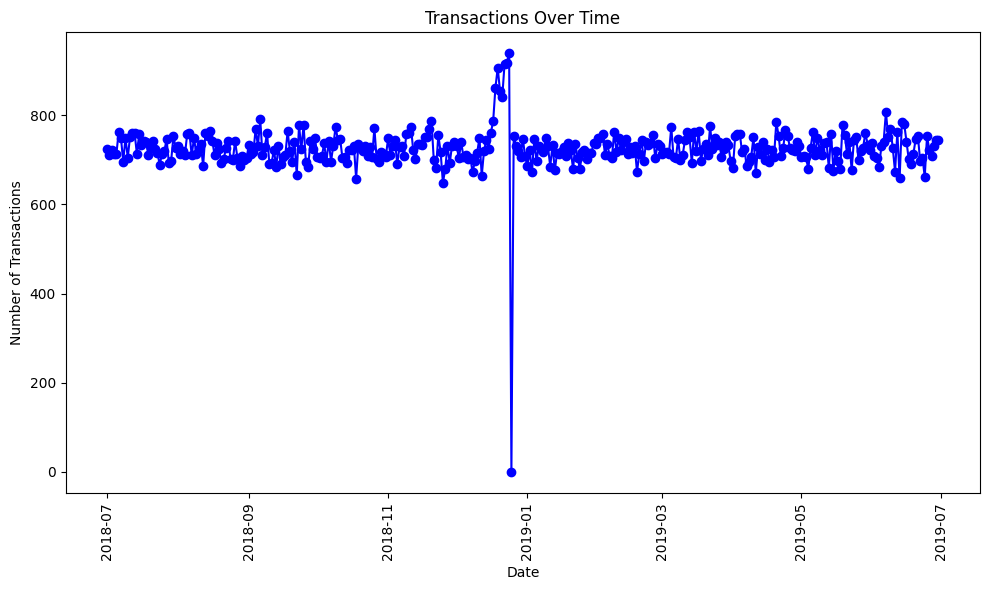

In [42]:
import matplotlib.pyplot as plt

# Plot the number of transactions over time
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'], marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
import re

# Function to extract pack size (digits followed by 'g')
def extract_pack_size(prod_name):
    match = re.search(r'(\d+)(?=g)', prod_name)  # Match digits before 'g'
    if match:
        return int(match.group(0))
    return None  # Return None if no pack size is found

# Apply the function to the PROD_NAME column
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(extract_pack_size)

# Check if the pack sizes look sensible by counting the occurrences of each pack size
print(transaction_data.groupby('PACK_SIZE').size().sort_values())


PACK_SIZE
125.0     1454
180.0     1468
70.0      1507
220.0     1564
160.0     2970
190.0     2995
90.0      3008
210.0     3167
250.0     3169
135.0     3257
200.0     4473
270.0     6285
380.0     6418
330.0    12540
300.0    15166
165.0    15297
170.0    19983
110.0    22387
134.0    25102
150.0    41633
175.0    64929
dtype: int64


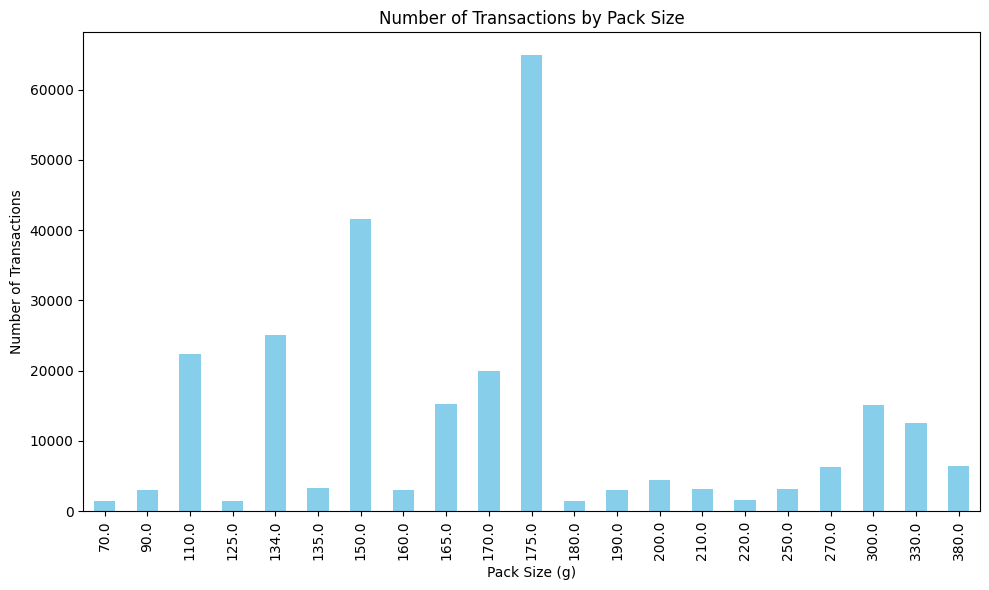

In [44]:
import matplotlib.pyplot as plt

# Plot a histogram of pack sizes
plt.figure(figsize=(10, 6))
transaction_data['PACK_SIZE'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [45]:
# Function to extract the brand name (the first word in PROD_NAME)
def extract_brand_name(prod_name):
    return prod_name.split()[0]

# Apply the function to the PROD_NAME column
transaction_data['BRAND'] = transaction_data['PROD_NAME'].apply(extract_brand_name)

# Check the unique brands to ensure correctness
print(transaction_data['BRAND'].unique())


['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


In [46]:
# Clean brand names by combining similar ones
transaction_data['BRAND'] = transaction_data['BRAND'].replace({
    'RED': 'RRD',  # Combine "RED" and "RRD" for Red Rock Deli
    'Infzns': 'Infuzions',  # Combine "Infzns" and "Infuzions"
    'Dorito': 'Doritos',  # Combine "Dorito" and "Doritos"
    'GrnWves': 'Grain Waves',  # Combine "GrnWves" and "Grain Waves"
    'WW': 'Woolworths',  # Combine "WW" and "Woolworths"
    'Snbts': 'Sunbites',  # Combine "Snbts" and "Sunbites"
    'Smith': 'Smiths',  # Combine "Smith" and "Smiths"
    'Tyrrells': 'Tyrrells Chips',  # Make sure to standardize naming
    'Cobs': 'Cobs Chips',  # Standardize Cobs Chips
    'Burger': 'Burger Rings',  # Standardize Burger Rings
    'Cheezels': 'Cheezels Snacks'  # Standardize Cheezels
})

# Check the unique brand names after cleaning
print(transaction_data['BRAND'].unique())


['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger Rings' 'NCC' 'Cheezels Snacks' 'Infuzions'
 'Red' 'Pringles' 'Grain Waves' 'Tyrrells Chips' 'Cobs Chips' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Sunbites']


In [47]:
# Check the cleaned brand names again
brand_counts = transaction_data['BRAND'].value_counts()
print(brand_counts)


BRAND
Kettle             41288
Smiths             31823
Doritos            28147
Pringles           25102
Woolworths         14757
Infuzions          14201
Thins              14075
RRD                11894
Cobs Chips          9693
Tostitos            9471
Twisties            9454
Old                 9324
Tyrrells Chips      6442
Grain               6272
Natural             6050
Red                 5885
Cheezels Snacks     4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
Grain Waves         1468
NCC                 1419
French              1418
Name: count, dtype: int64


In [48]:
# Remove leading/trailing spaces from the BRAND column
transaction_data['BRAND'] = transaction_data['BRAND'].str.strip()


In [49]:
# Clean brand names by combining similar ones
transaction_data['BRAND'] = transaction_data['BRAND'].replace({
    'RED': 'RRD',  # Combine "RED" and "RRD" for Red Rock Deli
    'Infzns': 'Infuzions',  # Combine "Infzns" and "Infuzions"
    'Dorito': 'Doritos',  # Combine "Dorito" and "Doritos"
    'GrnWves': 'Grain Waves',  # Combine "GrnWves" and "Grain Waves"
    'WW': 'Woolworths',  # Combine "WW" and "Woolworths"
    'Snbts': 'Sunbites',  # Combine "Snbts" and "Sunbites"
    'Smith': 'Smiths',  # Combine "Smith" and "Smiths"
    'Tyrrells': 'Tyrrells Chips',  # Make sure to standardize naming
    'Cobs': 'Cobs Chips',  # Standardize Cobs Chips
    'Burger': 'Burger Rings',  # Standardize Burger Rings
    'Cheezels': 'Cheezels Snacks'  # Standardize Cheezels
})

# Check the cleaned brand names again
brand_counts = transaction_data['BRAND'].value_counts()
print(brand_counts)


BRAND
Kettle             41288
Smiths             31823
Doritos            28147
Pringles           25102
Woolworths         14757
Infuzions          14201
Thins              14075
RRD                11894
Cobs Chips          9693
Tostitos            9471
Twisties            9454
Old                 9324
Tyrrells Chips      6442
Grain               6272
Natural             6050
Red                 5885
Cheezels Snacks     4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
Grain Waves         1468
NCC                 1419
French              1418
Name: count, dtype: int64


In [50]:
# Check unique brand names after the cleaning process
print(transaction_data['BRAND'].unique())


['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger Rings' 'NCC' 'Cheezels Snacks' 'Infuzions'
 'Red' 'Pringles' 'Grain Waves' 'Tyrrells Chips' 'Cobs Chips' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Sunbites']


In [51]:
# Inspect a few rows where the brand name might not be updating
print(transaction_data[['PROD_NAME', 'BRAND']].head(10))


                                  PROD_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g      Old
6  Smiths Crinkle Chips Salt & Vinegar 330g   Smiths
7     Grain Waves         Sweet Chilli 210g    Grain
8   Doritos Corn Chip Mexican Jalapeno 150g  Doritos
9     Grain Waves Sour    Cream&Chives 210G    Grain


In [53]:
# Improved brand cleaning using more variations and multiple replacements
transaction_data['BRAND'] = transaction_data['BRAND'].replace({
    'Red': 'RRD',  # Combine "RED" and "RRD" for Red Rock Deli
    'Infzns': 'Infuzions',  # Combine "Infzns" and "Infuzions"
    'Dorito': 'Doritos',  # Combine "Dorito" and "Doritos"
    'GrnWves': 'Grain Waves',  # Combine "GrnWves" and "Grain Waves"
    'WW': 'Woolworths',  # Combine "WW" and "Woolworths"
    'Snbts': 'Sunbites',  # Combine "Snbts" and "Sunbites"
    'Smith': 'Smiths',  # Combine "Smith" and "Smiths"
    'Tyrrells': 'Tyrrells Chips',  # Standardize Tyrrells Chips
    'Cobs': 'Cobs Chips',  # Standardize Cobs Chips
    'Burger': 'Burger Rings',  # Standardize Burger Rings
    'Cheezels': 'Cheezels Snacks',  # Standardize Cheezels
    'Thins': 'Smiths',  # If 'Thins' is part of Smiths, adjust accordingly
    'NCC': 'Smiths',  # If NCC refers to Smiths chips, adjust
})

# Check cleaned brand names again
print(transaction_data['BRAND'].unique())


['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties'
 'Woolworths' 'Burger Rings' 'Cheezels Snacks' 'Infuzions' 'RRD'
 'Pringles' 'Grain Waves' 'Tyrrells Chips' 'Cobs Chips' 'French'
 'Tostitos' 'Cheetos' 'Sunbites']


In [55]:
brand_counts = transaction_data['BRAND'].value_counts()
print(brand_counts)


BRAND
Smiths             47317
Kettle             41288
Doritos            28147
Pringles           25102
RRD                17779
Woolworths         14757
Infuzions          14201
Cobs Chips          9693
Tostitos            9471
Twisties            9454
Old                 9324
Tyrrells Chips      6442
Grain               6272
Natural             6050
Cheezels Snacks     4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
Grain Waves         1468
French              1418
Name: count, dtype: int64


# CUSTOMER DATASET

### Examining customer data


In [58]:
purchase_behaviour = pd.read_csv("D:\\Quantium_Data_Analysis_job\\QVI_purchase_behaviour.csv")


In [59]:
# basic summaries
print(purchase_behaviour.info())
print(purchase_behaviour.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN


In [60]:
# check for unique values 
for col in purchase_behaviour.columns:
    print(f"Unique values in {col}: {purchase_behaviour[col].nunique()}")

Unique values in LYLTY_CARD_NBR: 72637
Unique values in LIFESTAGE: 7
Unique values in PREMIUM_CUSTOMER: 3


#### Merge transaction data to customer data


In [61]:
# merge transaction data with the purchase behaviour data
data = pd.merge(transaction_data, purchase_behaviour, how="left", on="LYLTY_CARD_NBR")

# CONFIRMATION
print(f"Number of rows before merge: {len(transaction_data)}")
print(f"Number of rows after merge: {len(data)}")

Number of rows before merge: 264836
Number of rows after merge: 264836


### checking for missing customer details

In [62]:
missing_customers = data[data.isnull().any(axis=1)]

if missing_customers.empty:
    print("All transactions have matcjhed customers")
else:
    print(f"There are {len(missing_customers)} transactions with missing customer details")
    print(missing_customers.head())

There are 6064 transactions with missing customer details
          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
9   2018-08-18          7            7150    6900        52   
34  2018-08-16         51           51100   46802        48   
35  2018-08-19         51           51100   46803        37   
212 2019-03-13          1            1348     391        48   
292 2018-09-02          5            5018    4465        52   

                                    PROD_NAME  PROD_QTY  TOT_SALES  SALSA  \
9       Grain Waves Sour    Cream&Chives 210G         2        7.2  False   
34    Red Rock Deli Sp    Salt & Truffle 150G         1        2.7  False   
35   Smiths Thinly       Swt Chli&S/Cream175G         1        3.0  False   
212   Red Rock Deli Sp    Salt & Truffle 150G         1        2.7  False   
292     Grain Waves Sour    Cream&Chives 210G         2        7.2  False   

     PACK_SIZE   BRAND               LIFESTAGE PREMIUM_CUSTOMER  
9          NaN   Grain  MIDAGE SIN

In [65]:
missing_pack_size = data['PACK_SIZE'].isnull().sum()
print(f"Number of missing values in PACK_SIZE: {missing_pack_size}")



Number of missing values in PACK_SIZE: 6064


In [66]:
print(data['PACK_SIZE'].value_counts())


PACK_SIZE
175.0    64929
150.0    41633
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6418
270.0     6285
200.0     4473
135.0     3257
250.0     3169
210.0     3167
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64


In [67]:
most_common_pack_size = data['PACK_SIZE'].mode()[0]
data['PACK_SIZE'].fillna(most_common_pack_size, inplace=True)


C:\Users\Navas Herbert\AppData\Local\Temp\ipykernel_14424\2086629103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PACK_SIZE'].fillna(most_common_pack_size, inplace=True)


In [68]:
print(data['PACK_SIZE'].isnull().sum())


0


In [69]:
data.to_csv("D:\\Quantium_Data_Analysis_job\\QVI_data.csv", index=False)
print("Merged dataset saved as QVI_data.csv.")

Merged dataset saved as QVI_data.csv.


## Data analysis on customer segments

#### Calculate Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [71]:
#group by LIFESTAGE and PREMIUM_CUSTOMER and calculate total sales

sales_summary = (data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False))

print(sales_summary)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES          Premium   41642.10
0   MIDAGE

#### Plot sales by LIFESTAGE and PREMIUM_CUSTOMER



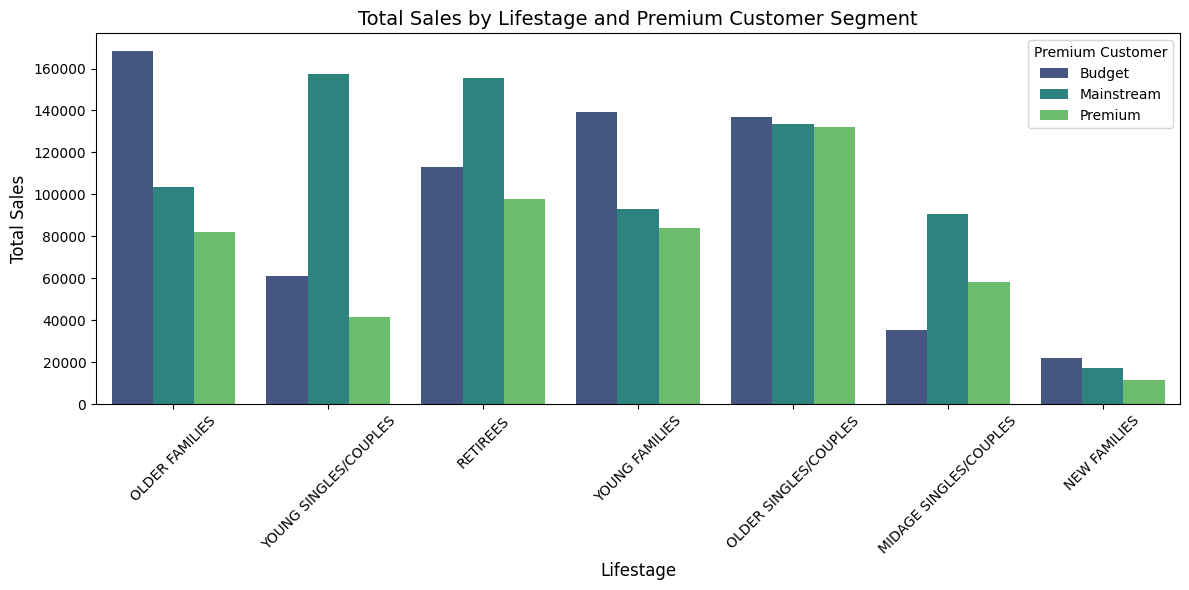

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_summary,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='viridis'
)
plt.title('Total Sales by Lifestage and Premium Customer Segment', fontsize=14)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()


### Number of customers in each segment

In [74]:
customer_count = (data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index().rename(columns={'LYLTY_CARD_NBR': 'Customer Count'}))

print(customer_count)

                 LIFESTAGE PREMIUM_CUSTOMER  Customer Count
0   MIDAGE SINGLES/COUPLES           Budget            1504
1   MIDAGE SINGLES/COUPLES       Mainstream            3340
2   MIDAGE SINGLES/COUPLES          Premium            2431
3             NEW FAMILIES           Budget            1112
4             NEW FAMILIES       Mainstream             849
5             NEW FAMILIES          Premium             588
6           OLDER FAMILIES           Budget            4675
7           OLDER FAMILIES       Mainstream            2831
8           OLDER FAMILIES          Premium            2274
9    OLDER SINGLES/COUPLES           Budget            4929
10   OLDER SINGLES/COUPLES       Mainstream            4930
11   OLDER SINGLES/COUPLES          Premium            4750
12                RETIREES           Budget            4454
13                RETIREES       Mainstream            6479
14                RETIREES          Premium            3872
15          YOUNG FAMILIES           Bud

### Chips Bough per customer by segment

In [75]:
chips_per_customer = (data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index())

chips_per_customer['Chips per Customer'] = (chips_per_customer['PROD_QTY'] / customer_count['Customer Count'])

print(chips_per_customer)

                 LIFESTAGE PREMIUM_CUSTOMER  PROD_QTY  Chips per Customer
0   MIDAGE SINGLES/COUPLES           Budget      9496            6.313830
1   MIDAGE SINGLES/COUPLES       Mainstream     22699            6.796108
2   MIDAGE SINGLES/COUPLES          Premium     15526            6.386672
3             NEW FAMILIES           Budget      5571            5.009892
4             NEW FAMILIES       Mainstream      4319            5.087161
5             NEW FAMILIES          Premium      2957            5.028912
6           OLDER FAMILIES           Budget     45065            9.639572
7           OLDER FAMILIES       Mainstream     27756            9.804309
8           OLDER FAMILIES          Premium     22171            9.749780
9    OLDER SINGLES/COUPLES           Budget     35220            7.145466
10   OLDER SINGLES/COUPLES       Mainstream     34997            7.098783
11   OLDER SINGLES/COUPLES          Premium     33986            7.154947
12                RETIREES           B

#### Average chip price by Customer Segment

In [76]:
avg_chip_price = (data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index())

avg_chip_price['Avg Price per chip'] = (avg_chip_price['TOT_SALES'] / chips_per_customer['PROD_QTY'])

print(avg_chip_price)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  Avg Price per chip
0   MIDAGE SINGLES/COUPLES           Budget   35514.80            3.739975
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85            4.000346
2   MIDAGE SINGLES/COUPLES          Premium   58432.65            3.763535
3             NEW FAMILIES           Budget   21928.45            3.936178
4             NEW FAMILIES       Mainstream   17013.90            3.939315
5             NEW FAMILIES          Premium   11491.10            3.886067
6           OLDER FAMILIES           Budget  168363.25            3.736009
7           OLDER FAMILIES       Mainstream  103445.55            3.726962
8           OLDER FAMILIES          Premium   81958.40            3.696649
9    OLDER SINGLES/COUPLES           Budget  136769.80            3.883299
10   OLDER SINGLES/COUPLES       Mainstream  133393.80            3.811578
11   OLDER SINGLES/COUPLES          Premium  132263.15            3.891695
12                RETIREE

#### Summary of number of customers by dimensions


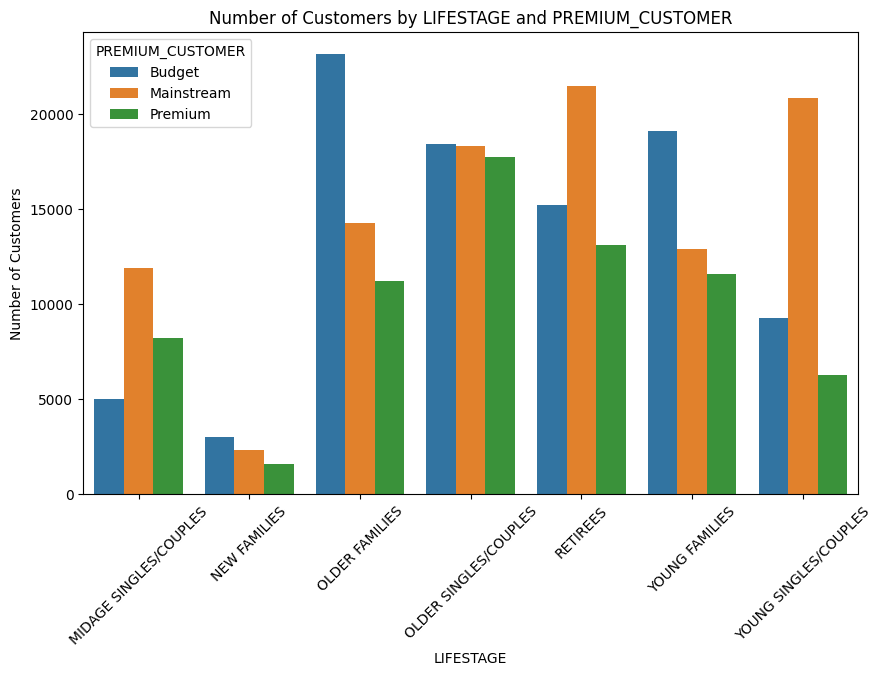

In [77]:

customer_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='num_customers')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='num_customers', hue='PREMIUM_CUSTOMER', data=customer_summary)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


### Avg number of units per customer

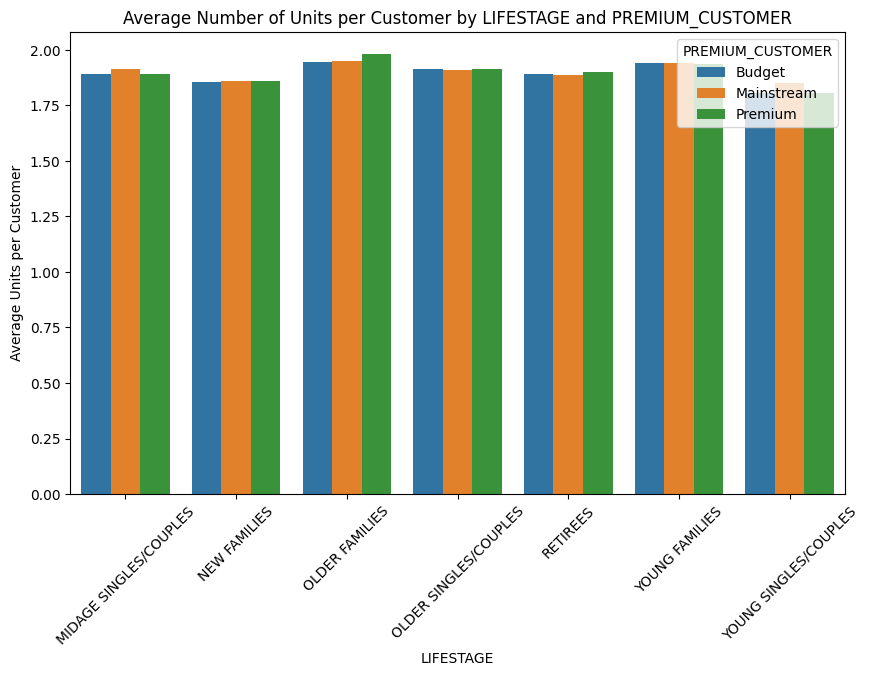

In [80]:
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index(name='avg_units')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='avg_units', hue='PREMIUM_CUSTOMER', data=avg_units)
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.show()


In [79]:
print(data.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'SALSA', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')


In [ ]:
import scipy.stats as stats

mainstream = data[data['PREMIUM_CUSTOMER'] == 'Mainstream']
budget_premium_midage_young = data[data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]

# Perform t-test for Mid-Age and Young Singles/Couples (adjust column names as per your dataset)
t_stat, p_value = stats.ttest_ind(mainstream['TOT_SALES'], budget_premium_midage_young['TOT_SALES'])

# Print the t-test results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Interpreting the result
if p_value < 0.05:
    result = 'ARE significantly higher'
else:
    result = 'ARE NOT significantly higher'

print(f"The unit price for mainstream, young and mid-age singles and couples {result} than that of budget or premium, young and midage singles and couples.")


T-statistic: 7.517524933595948, P-value: 5.599737040675448e-14
The unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.


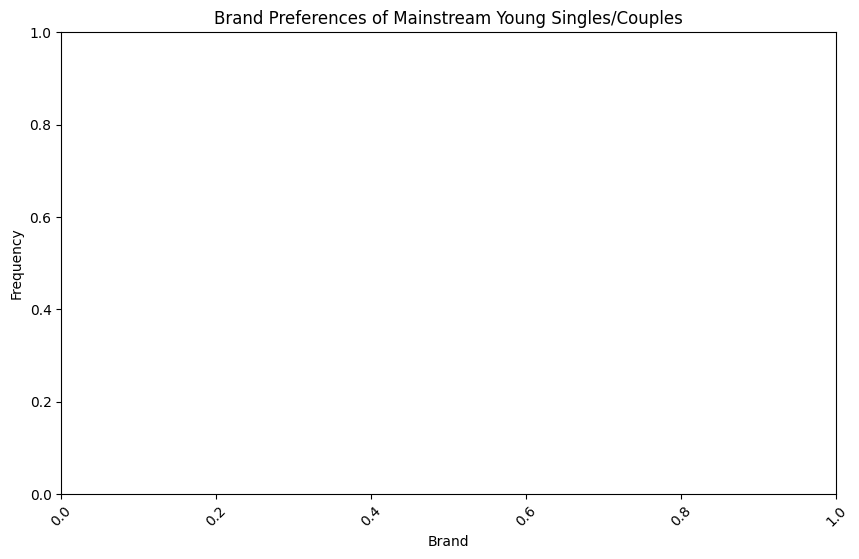

In [83]:
# Filter data for "Mainstream - young singles/couples"
mainstream_young_singles_couples = data[(data['LIFESTAGE'] == 'Young Singles/Couples') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Find the most common brands purchased by this segment
brand_preferences = mainstream_young_singles_couples['BRAND'].value_counts().reset_index()
brand_preferences.columns = ['Brand', 'Frequency']

# Plot the brand preferences
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Frequency', data=brand_preferences)
plt.title('Brand Preferences of Mainstream Young Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.